<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/CVassignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***CNN model for MNIST Handwritten Digit Classification***



Loading and preprocessing data...
Creating model...
Training model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 401s 905ms/step - accuracy: 0.8293 - loss: 0.5774 - val_accuracy: 0.2201 - val_loss: 3.4095 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 380s 900ms/step - accuracy: 0.9769 - loss: 0.0707 - val_accuracy: 0.9870 - val_loss: 0.0466 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 379s 892ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9862 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 380s 887ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9892 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 334s 890ms/step - accuracy: 0.9889 - loss: 0.0328 - val_accuracy: 0.9927 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 382s 890ms/step - accuracy: 0.9913 - loss: 0.0282 - val_accuracy: 0.9912 - val_loss: 0.0301 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 380s 884ms/step - accura


Saving model...
Model saved as 'final_model.h5'

Evaluating model...
Test accuracy: 99.61%
Test loss: 0.0144


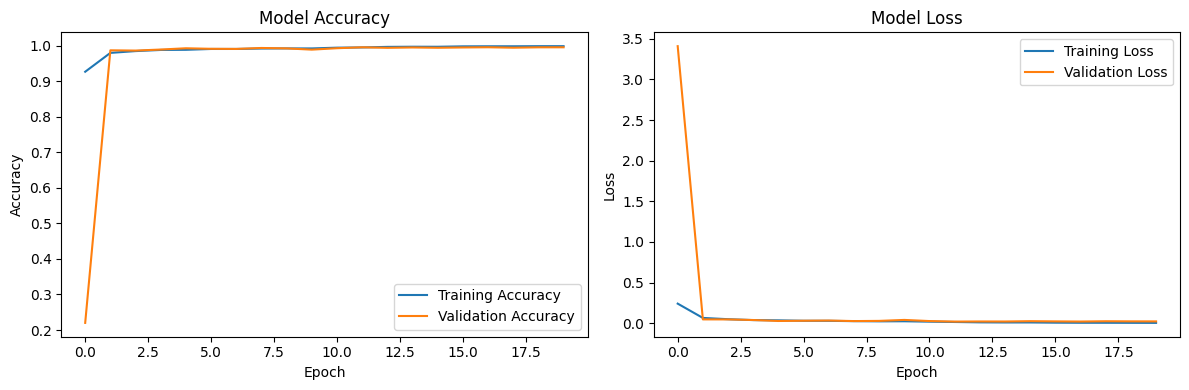

In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
def load_and_preprocess_data():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape data for CNN (add channel dimension)
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    # Normalize pixel values
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Convert labels to one-hot encoded format
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test

# Define an improved CNN model
def create_improved_model():
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Dense Layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    return model

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    X_train, y_train, X_test, y_test = load_and_preprocess_data()

    # Create and compile model
    print("Creating model...")
    model = create_improved_model()
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    # Define learning rate reduction callback
    lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                                  factor=0.5,
                                  patience=3,
                                  verbose=1,
                                  min_lr=1e-6)

    # Train the model
    print("Training model...")
    history = model.fit(X_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       callbacks=[lr_reducer],
                       verbose=1)

      # Save the trained model
    print("\nSaving model...")
    model.save('final_model.h5')
    print("Model saved as 'final_model.h5'")

    # Evaluate the model
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy*100:.2f}%")
    print(f"Test loss: {test_loss:.4f}")

    # Plot training history
    plot_training_history(history)

if __name__ == "__main__":
    main()

# ***Prediction through Sample image 1***

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load and prepare the image
def load_image(filename):
    # Load the image in grayscale and resize it to 28x28
    img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
    # Convert the image to a NumPy array
    img = img_to_array(img)
    # Reshape the array into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # Normalize pixel values
    img = img.astype('float32') / 255.0
    return img

# Load an image and predict the class
def predict_digit(filename):
    # Load the image
    img = load_image(filename)
    # Load the trained model
    model = load_model('final_model.h5')
    # Predict the class
    prediction = model.predict(img, verbose=0)
    digit = np.argmax(prediction)
    print(f"Predicted digit: {digit}")

# Example usage
if __name__ == "__main__":
    # Replace 'sample_image.png' with your image filename
    predict_digit('Sample-image.png')


Predicted digit: 7


# ***Prediction through Sample image 1***

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load and prepare the image
def load_image(filename):
    # Load the image in grayscale and resize it to 28x28
    img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
    # Convert the image to a NumPy array
    img = img_to_array(img)
    # Reshape the array into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # Normalize pixel values
    img = img.astype('float32') / 255.0
    return img

# Load an image and predict the class
def predict_digit(filename):
    # Load the image
    img = load_image(filename)
    # Load the trained model
    model = load_model('final_model.h5')
    # Predict the class
    prediction = model.predict(img, verbose=0)
    digit = np.argmax(prediction)
    print(f"Predicted digit: {digit}")

# Example usage
if __name__ == "__main__":
    # Replace 'sample_image.png' with your image filename
    predict_digit('img1.png')

Predicted digit: 5
